In [4]:
import sys
import numpy as np
sys.path.append("..")
sys.path.append("../sage")

# 1. Tensor to voigt conversion and voigt to tensor conversion

In [5]:
import tensor_conversion

In [6]:
voigt_stiffness = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
                [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
                [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
                [  0.,      0.,      0.,     65.66,    0.,      6.415],
                [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
                [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])

In [7]:
tensor = tensor_conversion.voigt_to_tensor(voigt_stiffness)

print(np.array(tensor))
print(np.shape(tensor))

[[[[198.96    0.      9.735]
   [  0.     73.595   0.   ]
   [  9.735   0.     68.185]]

  [[  0.     65.18    0.   ]
   [ 65.18    0.      6.415]
   [  0.      6.415   0.   ]]

  [[  9.735   0.     60.23 ]
   [  0.      6.295   0.   ]
   [ 60.23    0.     33.85 ]]]


 [[[  0.     65.18    0.   ]
   [ 65.18    0.      6.415]
   [  0.      6.415   0.   ]]

  [[ 73.595   0.      6.295]
   [  0.    155.94    0.   ]
   [  6.295   0.     62.23 ]]

  [[  0.      6.415   0.   ]
   [  6.415   0.     65.66 ]
   [  0.     65.66    0.   ]]]


 [[[  9.735   0.     60.23 ]
   [  0.      6.295   0.   ]
   [ 60.23    0.     33.85 ]]

  [[  0.      6.415   0.   ]
   [  6.415   0.     65.66 ]
   [  0.     65.66    0.   ]]

  [[ 68.185   0.     33.85 ]
   [  0.     62.23    0.   ]
   [ 33.85    0.    225.99 ]]]]
(3, 3, 3, 3)


In [8]:
voigt = tensor_conversion.tensor_to_voigt(tensor)

In [9]:
print(np.array(voigt))

print(voigt == voigt_stiffness)

[[198.96   73.595  68.185   0.      9.735   0.   ]
 [ 73.595 155.94   62.23    0.      6.295   0.   ]
 [ 68.185  62.23  225.99    0.     33.85    0.   ]
 [  0.      0.      0.     65.66    0.      6.415]
 [  9.735   6.295  33.85    0.     60.23    0.   ]
 [  0.      0.      0.      6.415   0.     65.18 ]]
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


In [10]:
cijkl = tensor_conversion.voigt_to_tensor(voigt)
print(np.array(cijkl))
print(cijkl == tensor)

[[[[198.96    0.      9.735]
   [  0.     73.595   0.   ]
   [  9.735   0.     68.185]]

  [[  0.     65.18    0.   ]
   [ 65.18    0.      6.415]
   [  0.      6.415   0.   ]]

  [[  9.735   0.     60.23 ]
   [  0.      6.295   0.   ]
   [ 60.23    0.     33.85 ]]]


 [[[  0.     65.18    0.   ]
   [ 65.18    0.      6.415]
   [  0.      6.415   0.   ]]

  [[ 73.595   0.      6.295]
   [  0.    155.94    0.   ]
   [  6.295   0.     62.23 ]]

  [[  0.      6.415   0.   ]
   [  6.415   0.     65.66 ]
   [  0.     65.66    0.   ]]]


 [[[  9.735   0.     60.23 ]
   [  0.      6.295   0.   ]
   [ 60.23    0.     33.85 ]]

  [[  0.      6.415   0.   ]
   [  6.415   0.     65.66 ]
   [  0.     65.66    0.   ]]

  [[ 68.185   0.     33.85 ]
   [  0.     62.23    0.   ]
   [ 33.85    0.    225.99 ]]]]
True


# 2. Tensor rotation

In [11]:
import tensor_rotation
import tensor_conversion

In [12]:
import numpy as np
import pandas as pd
M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
             [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
             [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
             [  0.,      0.,      0.,     65.66,    0.,      6.415],
             [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
              [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])

tensor = tensor_conversion.voigt_to_tensor(M)

print("Original tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor_conversion.tensor_to_voigt(tensor))))

alpha = 30 # Rotation angle around x axis in degrees
beta = 50 # Rotation angle around y axis in degrees
gamma = 80    # Rotation angle around z axis in degrees
output = tensor_rotation.rotate_tensor(tensor, alpha, beta, gamma)

Original tensor in voigt matrix convention:
         0        1        2       3       4       5
0  198.960   73.595   68.185   0.000   9.735   0.000
1   73.595  155.940   62.230   0.000   6.295   0.000
2   68.185   62.230  225.990   0.000  33.850   0.000
3    0.000    0.000    0.000  65.660   0.000   6.415
4    9.735    6.295   33.850   0.000  60.230   0.000
5    0.000    0.000    0.000   6.415   0.000  65.180


In [13]:
import pandas as pd
print("Output rotated tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor_conversion.tensor_to_voigt(output))))

Output rotated tensor in voigt matrix convention:
            0           1           2          3          4          5
0  163.693713   55.220198   77.338017   5.086870   7.071287  -5.303336
1   55.220198  162.595508   80.120640   2.703473   1.693446   6.120997
2   77.338017   80.120640  237.263069 -16.495696  10.098474  -4.779734
3    5.086870    2.703473  -16.495696  72.427633  -3.653123   3.255414
4    7.071287    1.693446   10.098474  -3.653123  73.872931  -0.574649
5   -5.303336    6.120997   -4.779734   3.255414  -0.574649  53.438291


# 3. Calculating Christoffel tensors

In [14]:
import christoffel

In [15]:
M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
                [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
                [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
                [  0.,      0.,      0.,     65.66,    0.,      6.415],
                [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
                [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])
import tensor_conversion
tensor_M = tensor_conversion.voigt_to_tensor(M)
stiffness = tensor_M
direction = np.array([1, 0, 0])
density = 3500.0
christoffel_t = christoffel.christoffel_tensor(stiffness, direction)
wave_moduli, velocities, polarization_directions = christoffel.wave_properties(christoffel_t, density)
print("Christoffel tensor:")
print(christoffel_t)
print("Wave moduli:")
print(wave_moduli)
print("Velocities:")
print(velocities)
print("Polarization directions:")
print(polarization_directions)

Direction:  [1. 0. 0.]
Christoffel tensor:
[[198.96    0.      9.735]
 [  0.     65.18    0.   ]
 [  9.735   0.     60.23 ]]
Wave moduli:
[199.63979602368758, 65.18, 59.55020397631241]
Velocities:
[0.23883036180740003, 0.13646558959260444, 0.13043904320881886]
Polarization directions:
[[ 0.99757076  0.         -0.06966047]
 [ 0.          1.          0.        ]
 [ 0.06966047  0.          0.99757076]]


# 4. Calculating velocity

In [16]:
import christoffel_wave_prop

In [17]:
import numpy as np
import tensor_conversion
M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
                [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
                [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
                [  0.,      0.,      0.,     65.66,    0.,      6.415],
                [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
                [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9

cijkl = tensor_conversion.voigt_to_tensor(M)
rho = 3500

# Calculate vp, vs1 and vs2 over all the directions possible
vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
# Print vp, vs1 and vs2
print("The values of vp are:")
print("Min Vp: ", min(vp)/1000)
print("Max Vp: ", max(vp)/1000)
print("The values of vs1 are:")
print("Min Vs1: ", min(vs1)/1000)
print("Max Vs1: ", max(vs1)/1000)
print("The values of vs2 are:")
print("Min Vs2: ", min(vs2)/1000)
print("Max Vs2: ", max(vs2)/1000)

The values of vp are:
Min Vp:  6.674899678218821
Max Vp:  8.609687354376568
The values of vs1 are:
Min Vs1:  3.9755539348056756
Max Vs1:  4.7153920922273524
The values of vs2 are:
Min Vs2:  3.680816097015434
Max Vs2:  4.528474076886109


# 5. Anisotropy plot

/Users/usin8611/Documents/code_sydney/codes_anisotropy/anisotropy/notebooks/../sage/cijkl_2dplots_vp.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels(['{:.1f}'.format(v) for v in cb.get_ticks()])


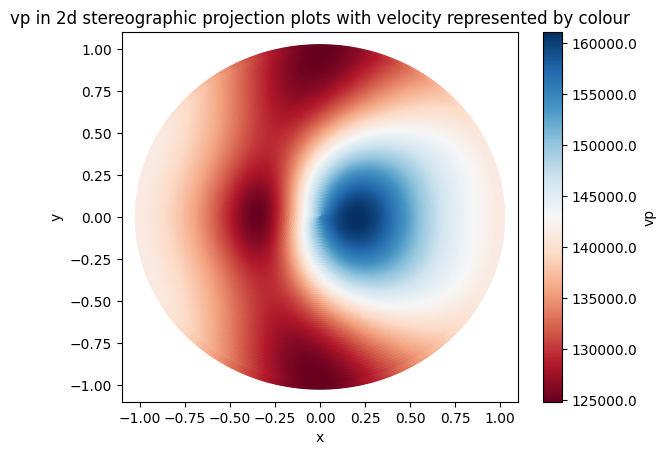

In [18]:
import tensor_conversion
# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
import cijkl_2dplots_vp
M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
                [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
                [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
                [  0.,      0.,      0.,     65.66,    0.,      6.415],
                [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
                [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9

cijkl = tensor_conversion.voigt_to_tensor(M)

rho = 10

# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
cijkl_2dplots_vp.plot_vp_2d(cijkl, rho)